## **Clusterización / Algoritmo K-means (Core)**

### **Algoritmo K-means (Core)**

El algoritmo K-means es uno de los métodos de agrupamiento más utilizados en análisis de datos y machine learning. Este algoritmo busca agrupar un conjunto de datos en K grupos o clusters, donde cada grupo está definido por un centroide. En esta actividad, utilizaremos el algoritmo K-means para analizar y segmentar clientes en función de su comportamiento de compra, utilizando el dataset «Mall Customer Segmentation Data» de Kaggle.

**Enlace al dataset:** https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python



### **Objetivo de la Actividad**

El objetivo de esta actividad es utilizar el algoritmo K-means para identificar diferentes grupos de clientes según su comportamiento de compra. El análisis de los clusters resultantes permitirá obtener una mejor comprensión de las características de los clientes, lo que puede ser útil para personalizar estrategias de marketing y mejorar la experiencia del cliente.



### **Descripción del Algoritmo K-means**

K-means es un algoritmo de aprendizaje no supervisado que agrupa datos en K clusters o grupos, donde K es un número predefinido. Cada cluster se representa mediante un centroide, que es el promedio de todos los puntos de datos en ese grupo. El algoritmo tiene dos fases principales:

1. **Asignación de clusters:** Cada punto de datos se asigna al centroide más cercano.
2. **Actualización de centroides:** Se recalcula la posición de los centroides basándose en la media de los puntos de datos asignados a cada cluster.

Este proceso se repite hasta que los centroides no cambian significativamente o se alcanza un número máximo de iteraciones.


### **Instrucciones**

#### 1. **Carga del Dataset:**
  - El dataset contiene información sobre clientes de un centro comercial, como su género, edad, ingresos anuales y puntaje de gasto.
  - Utiliza el archivo «Mall_Customers.csv» y cárgalo en tu entorno de trabajo.

#### 2. **Selección de Variables:**
  - Para este análisis, selecciona las variables ‘Annual Income (k$)’ y ‘Spending Score (1-100)’, ya que representan características importantes relacionadas con el comportamiento de compra.

#### 3. **Implementación de K-means:**
  - Aplica el algoritmo K-means utilizando diferentes valores de K (por ejemplo, K = 3, 4, 5) y observa cómo se agrupan los clientes.
  - Visualiza los resultados utilizando gráficos de dispersión que representen los clusters y los centroides.

#### 4. **Elbow Method:**
- Utiliza el método del codo para identificar el número óptimo de clusters. Este método consiste en ejecutar K-means con diferentes valores de K y calcular la suma de errores cuadráticos (SSE). El valor óptimo de K se encuentra donde se produce una disminución significativa en el SSE.

#### 5. **Interpretación de Clusters:**
- Una vez obtenidos los clusters, analiza cada grupo. ¿Qué características tienen en común los clientes de cada cluster? ¿Cómo podrías usar esta información para diseñar estrategias de marketing personalizadas?

#### 6. **Análisis de Resultados:**
- Discute los resultados obtenidos. ¿Qué insights se pueden extraer de los grupos de clientes identificados? ¿Existen patrones o comportamientos comunes?


### **Expansión del Algoritmo y Aplicaciones**

El algoritmo K-means tiene una amplia gama de aplicaciones en diversas industrias. Algunos ejemplos incluyen:

- **Segmentación de Clientes:** Agrupar a los clientes según su comportamiento de compra o interacción con un producto.
- **Compresión de Imágenes:** Reducir el número de colores en una imagen agrupando píxeles similares.
- **Agrupación de Documentos:** Clasificar documentos en función de su similitud textual.

En esta actividad, el enfoque está en la segmentación de clientes para un centro comercial, pero el mismo algoritmo puede aplicarse a otros dominios como la biología, el procesamiento de señales y la detección de anomalías.

### **Librerias y Dataset**

In [1]:
import kagglehub
import os
import numpy as np
import pandas as pd
import utils
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


# Descargar el dataset
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
print("Path to dataset files:", path)
# Cargar el dataset
dataset_path = os.path.join(path, "Mall_Customers.csv")
df = pd.read_csv(dataset_path)

Path to dataset files: C:\Users\guill\.cache\kagglehub\datasets\vjchoudhary7\customer-segmentation-tutorial-in-python\versions\1


### **1. Exploratory Data Analisys**

In [2]:
print("Dimensiones del dataset:")
print(f"Features: {df.shape[1]}, Ejemplos: {df.shape[0]}")
print("Primeras 5 filas del dataset:")
df.head()

Dimensiones del dataset:
Features: 5, Ejemplos: 200
Primeras 5 filas del dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### **Analisis de distribuccion de las variables**

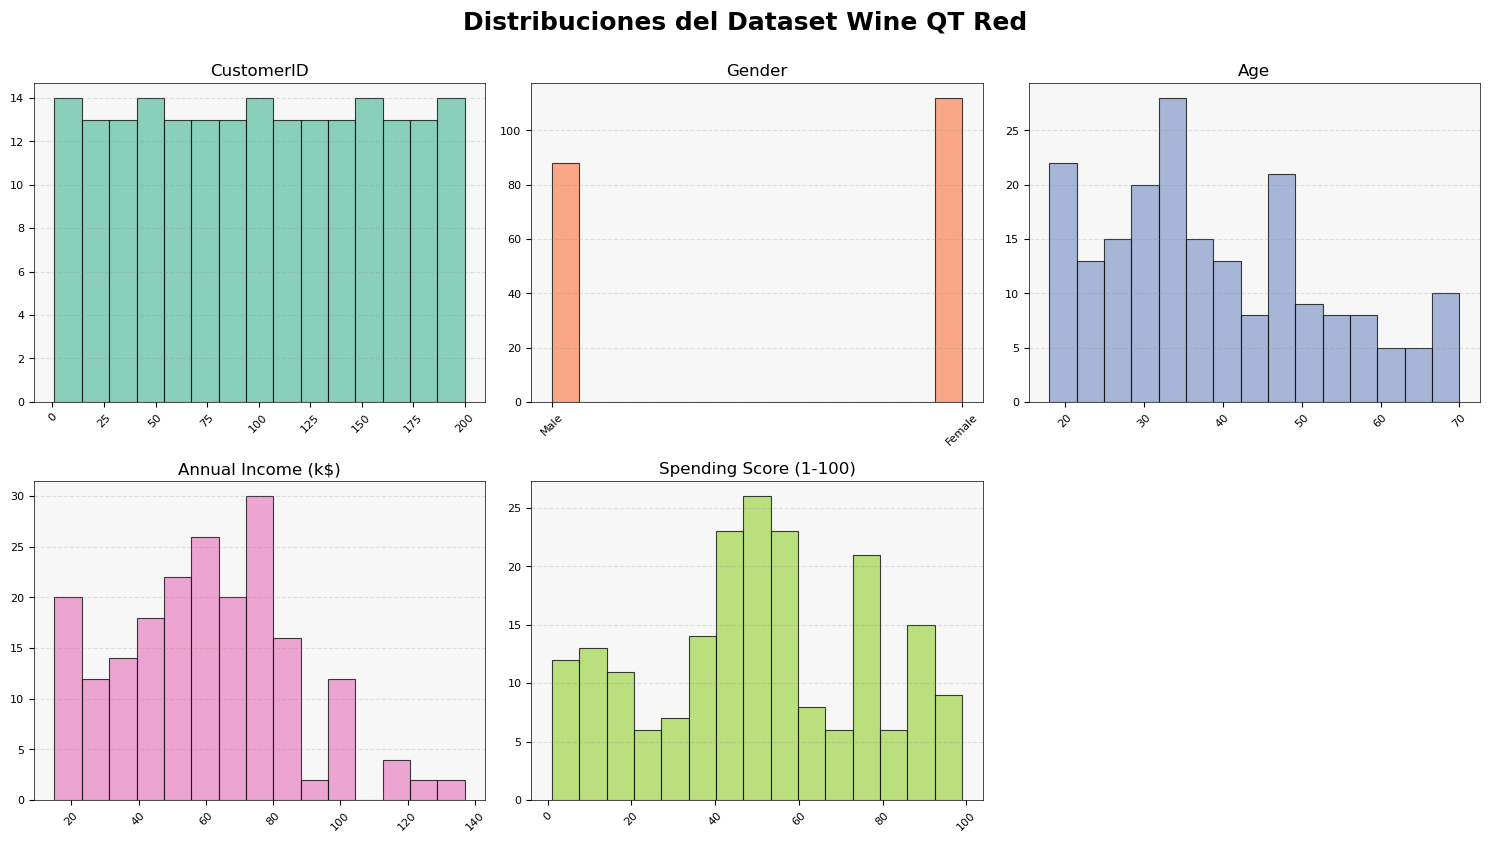

In [5]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20)) 
axes = axes.flatten()

colors = sns.color_palette("Set2", len(df.columns))
for i, col in enumerate(df.columns):
    if i < len(axes):  
         # Cambiar a ax.hist()
        axes[i].hist(df[col].dropna(), bins='sqrt', color=colors[i], alpha=0.75, edgecolor='black', linewidth=0.8)
        
        # Estética
        axes[i].set_title(col, fontsize=12, pad=5)
        axes[i].grid(axis='y', linestyle='--', color='gray', alpha=0.2)
        axes[i].set_facecolor('#f7f7f7')
        axes[i].spines['top'].set_color('black')
        axes[i].spines['top'].set_linewidth(0.5)
        axes[i].spines['right'].set_color('black')
        axes[i].spines['right'].set_linewidth(0.5)
        axes[i].spines['left'].set_color('black')
        axes[i].spines['left'].set_linewidth(0.5)
        axes[i].spines['bottom'].set_color('black')
        axes[i].spines['bottom'].set_linewidth(0.5)
        axes[i].tick_params(axis='x', rotation=45, labelsize=8, colors='black')
        axes[i].tick_params(axis='y', labelsize=8, colors='black')

# Eliminar ejes sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general y espaciado
fig.suptitle('Distribuciones del Dataset Wine QT Red', fontsize=18, fontweight='bold', y= 1)
plt.tight_layout()
plt.show()


- La variable ***Gender*** muestra un balance cercano entre hombres (Male) y mujeres (Female), con una ligera predominancia del género femenino. Este balance sugiere una representación equitativa de ambos grupos en el dataset.

- La variable ***Age*** tiene una distribución asimétrica con un pico alrededor de los 30 años. Los grupos de edad más jóvenes (20-30 años) son predominantes, mientras que las frecuencias disminuyen gradualmente a partir de los 50 años. Esto sugiere que la mayoría de los datos provienen de personas jóvenes y de mediana edad. 

- ***Annual Income (k$)*** tiene una distribución sesgada hacia los valores más bajos, con un pico entre los 60 y 80 mil dólares. Hay pocos datos para ingresos mayores a 100 mil dólares, lo que indica que el dataset está dominado por clientes de ingresos medios-bajos. 

- ***Spending Score (1-100)*** muestra una distribución más cercana a la normal, con la mayoría de los datos concentrados entre 40 y 60. Esto sugiere que la mayoría de los clientes tienen comportamientos de gasto moderados, con menor representación en los extremos (muy bajo o muy alto).

#### **Boxplots de todas las columnas**

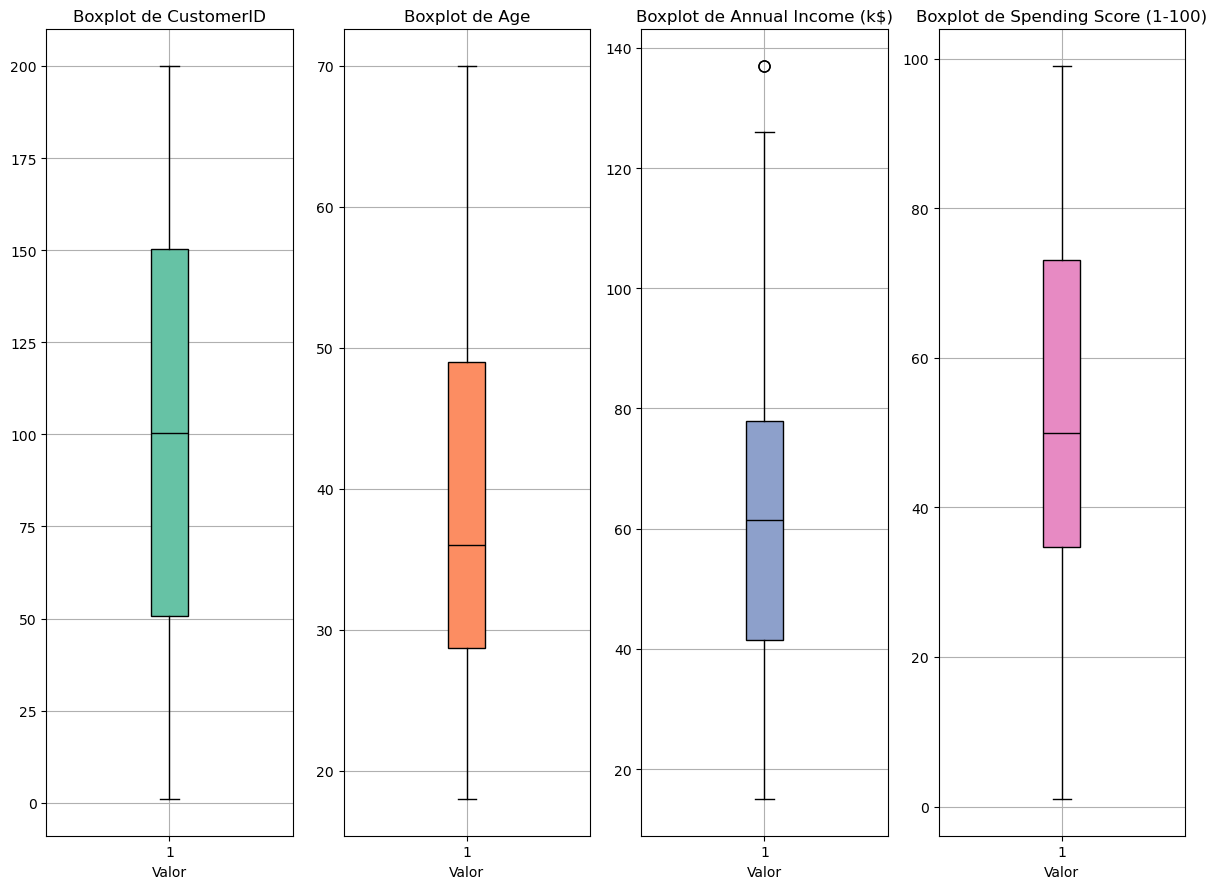

In [6]:
# Ejemplo con parámetros personalizados
fig, axes = utils.crear_multiple_boxplots(
    df,
    ncols=6,  # 3 columnas de gráficos
    figsize_width=3,  # Ancho de cada subplot
    figsize_height=9,  # Alto de cada fila
    color_palette="Set2",  # Diferente paleta de colores
    grid=True,  # Sin cuadrícula
    #custom_columns=['columna1', 'columna2']  # Solo graficar columnas específicas
)

plt.show()

**Age:** La mediana está en 35 años, con un rango intercuartílico entre 30 y 50. No hay valores atípicos significativos.

**Annual Income:** La mediana es de 60k, con la mayoría entre 40k y 80k. Hay un valor atípico por encima de 140k, indicando un cliente con ingresos muy altos.

**Spending Score:** Tiene una mediana de 50, con la mayoría de valores entre 35 y 65. La distribución es uniforme, sin valores extremos.

In [7]:
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in df.select_dtypes(include=[np.number]):
    outliers = utils.detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
CustomerID,0.0,0.0,1.0,200.0
Age,0.0,0.0,18.0,70.0
Annual Income (k$),2.0,1.0,15.0,126.0
Spending Score (1-100),0.0,0.0,1.0,99.0


#### **Grafico de dispersion de las variables**

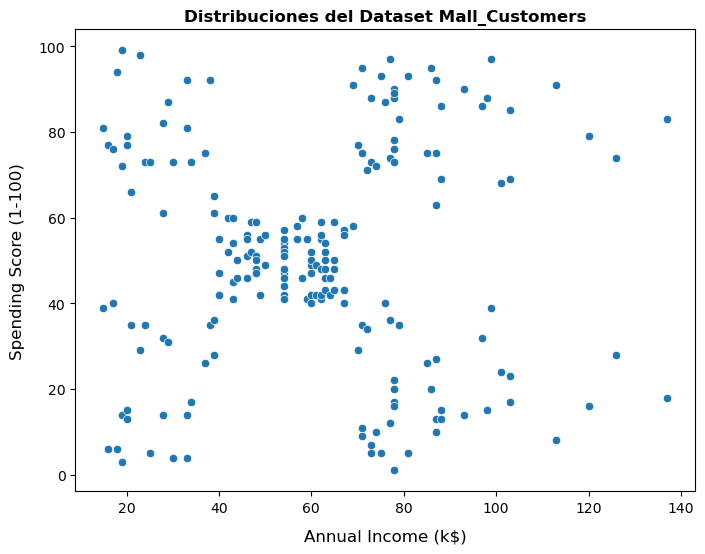

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Distribuciones del Dataset Mall_Customers', fontsize=12, fontweight='bold', y= 1)
plt.xlabel('Annual Income (k$)', fontsize=12, labelpad=10)
plt.ylabel('Spending Score (1-100)', fontsize=12, labelpad=10)
plt.show()

### **Cluster**

#### **2. Selección de Variables:**

In [9]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

Opcional, escalar las variables

In [10]:
# Opcional, escalar las variables con zscore
# X = (X - X.mean()) / X.std()

#### **3. Implementación de K-means:**

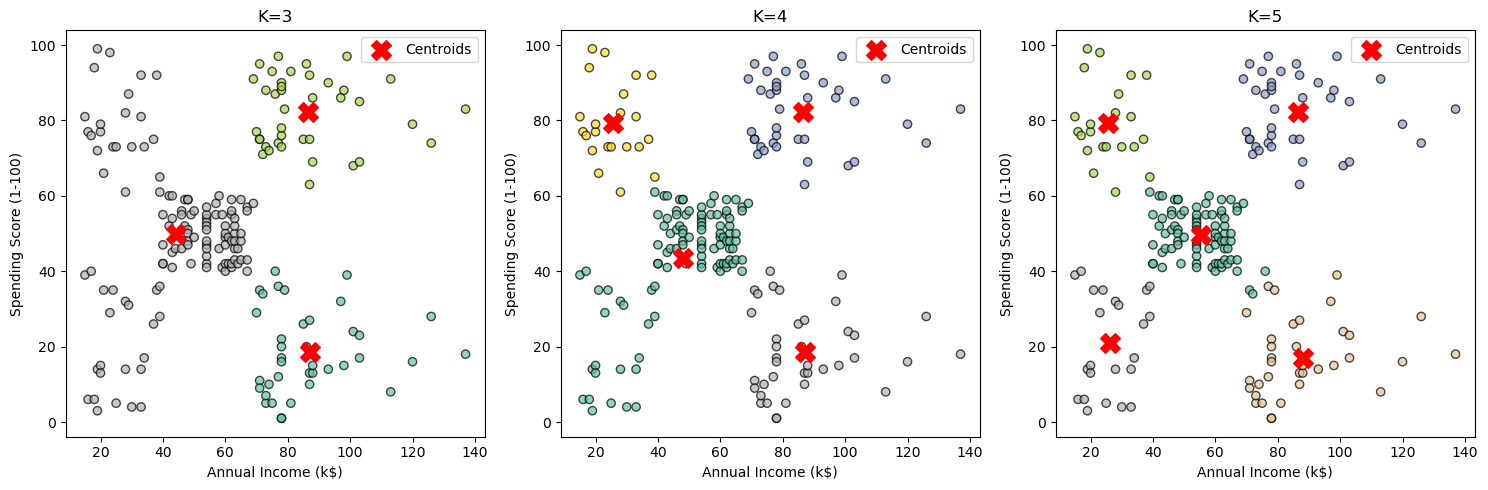

In [11]:
k_values = [3, 4, 5]
plt.figure(figsize=(15, 5))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_
    
    # Gráfico de dispersión
    plt.subplot(1, len(k_values), i + 1)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='Set2', alpha=0.7, edgecolor='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K={k}')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()

plt.tight_layout()
plt.show()

Para **\( K=3 \)**, los datos se agrupan en tres clusters principales: un grupo con altos ingresos y bajo gasto, otro con ingresos medios y alta dispersión de gasto, y un tercero con ingresos bajos distribuidos más uniformemente entre niveles de gasto. Sin embargo, se observa solapamiento en el grupo de ingresos medios. Al aumentar a **\( K=4 \)**, los clusters se redistribuyen, separando mejor los grupos de ingresos bajos y diferenciando más claramente los niveles de gasto. Con **\( K=5 \)**, se logra una segmentación más granular, especialmente en los grupos de ingresos altos, aunque hay cierta fragmentación en los datos de ingresos bajos.

#### **4. Método del codo**

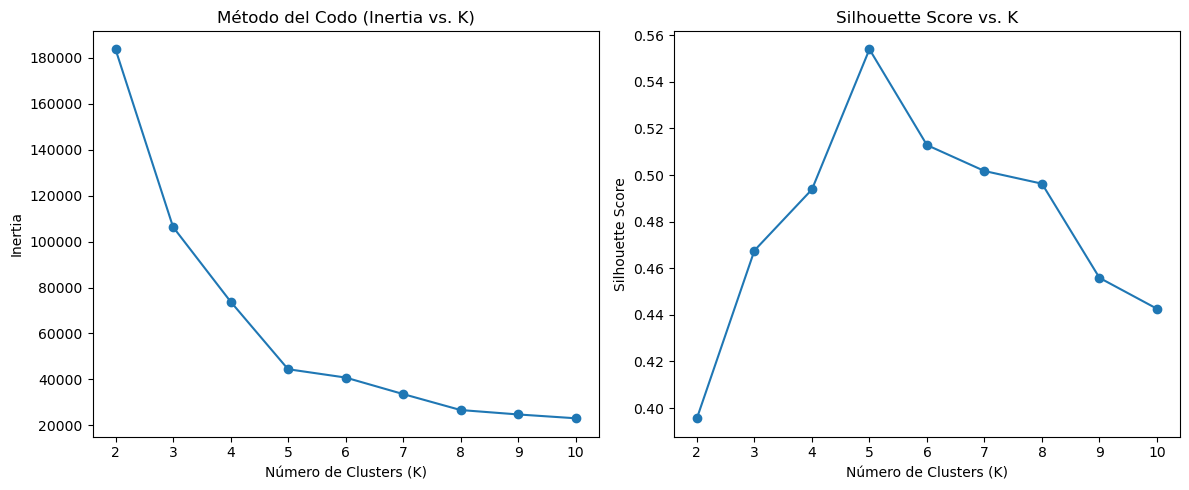

In [12]:
# Calcular Inertia y Silhouette Score para diferentes valores de K
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Crear gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Inertia
ax[0].plot(k_values, inertia, marker='o')
ax[0].set_title('Método del Codo (Inertia vs. K)')
ax[0].set_xlabel('Número de Clusters (K)')
ax[0].set_ylabel('Inertia')

# Gráfico de Silhouette Score
ax[1].plot(k_values, silhouette_scores, marker='o')
ax[1].set_title('Silhouette Score vs. K')
ax[1].set_xlabel('Número de Clusters (K)')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

El *método del codo* indica que la inercia disminuye rápidamente entre \( K=2 \) y \( K=5 \), lo que sugiere una mejora significativa en la compactación de los clusters. A partir de \( K=5 \), las reducciones son marginales, indicando que agregar más clusters puede no aportar suficiente valor. Por otro lado, el *Silhouette Score* alcanza su máximo en \( K=5 \), lo que sugiere que este número de clusters proporciona la mejor separación relativa entre grupos, optimizando tanto la cohesión dentro de los clusters como la separación entre ellos.

## **Adicionales**

### **Comparacion con 3 variables.**

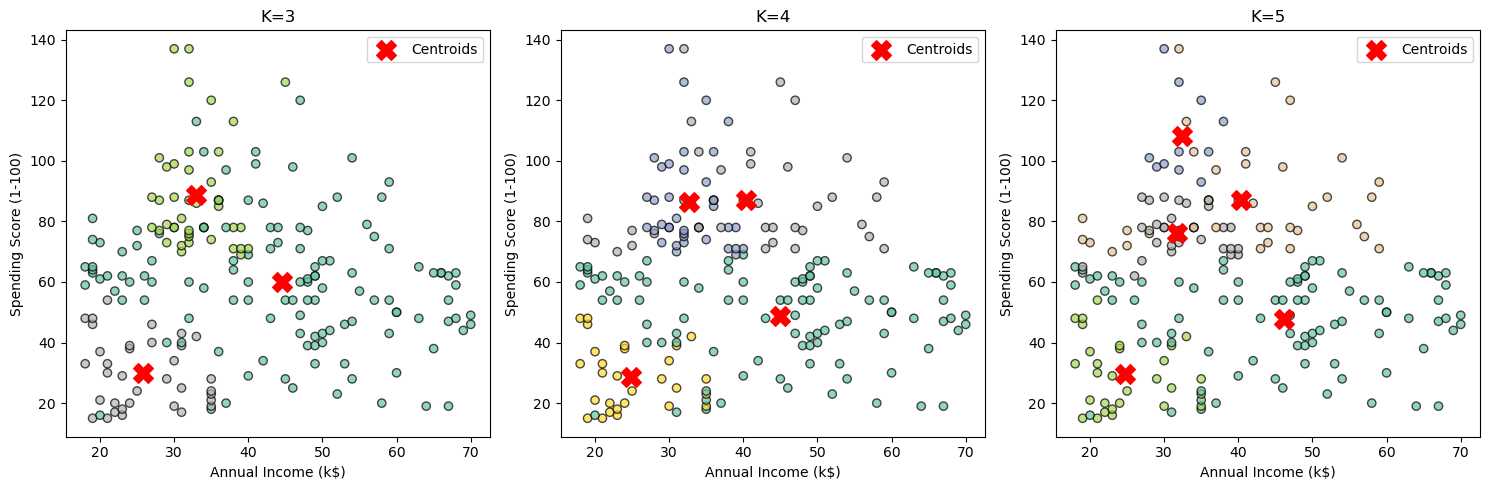

In [13]:
X2 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Opcional, escalar las variables con zscore
#X2 = (X2 - X2.mean()) / X2.std()

# 3. Implementación de K-means
k_values = [3, 4, 5,]
plt.figure(figsize=(15, 5))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X2)
    centroids = kmeans.cluster_centers_
    
    # Gráfico de dispersión
    plt.subplot(1, len(k_values), i + 1)
    plt.scatter(X2.iloc[:, 0], X2.iloc[:, 1], c=clusters, cmap='Set2', alpha=0.7, edgecolor='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K={k}')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()

plt.tight_layout()
plt.show()


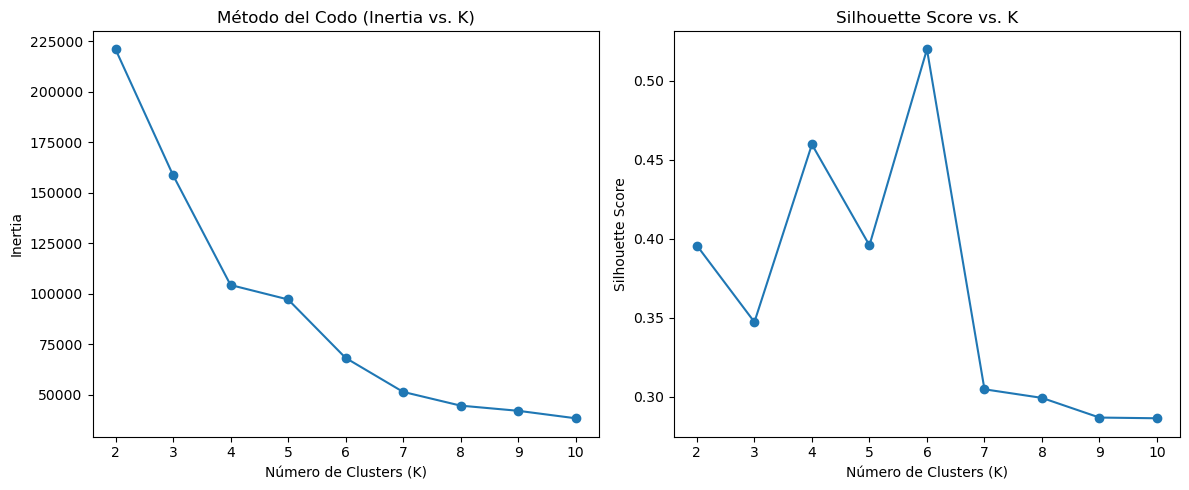

In [14]:
# 4. Método del codo

# Calcular Inertia y Silhouette Score para diferentes valores de K
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X2)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Crear gráficos
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Inertia
ax[0].plot(k_values, inertia, marker='o')
ax[0].set_title('Método del Codo (Inertia vs. K)')
ax[0].set_xlabel('Número de Clusters (K)')
ax[0].set_ylabel('Inertia')

# Gráfico de Silhouette Score
ax[1].plot(k_values, silhouette_scores, marker='o')
ax[1].set_title('Silhouette Score vs. K')
ax[1].set_xlabel('Número de Clusters (K)')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

### **Escalando**

In [15]:
actual_features = ['Annual Income (k$)', 'Spending Score (1-100)']

In [16]:
df[[x + '_std' for x in actual_features]] = (df[actual_features] - df[actual_features].mean())/df[actual_features].std()

In [17]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income (k$)_std,Spending Score (1-100)_std
0,1,Male,19,15,39,-1.734646,-0.433713
1,2,Male,21,15,81,-1.734646,1.192711
2,3,Female,20,16,6,-1.696572,-1.711618
3,4,Female,23,16,77,-1.696572,1.037814
4,5,Female,31,17,40,-1.658498,-0.394989
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2.263112,1.115262
196,197,Female,45,126,28,2.491555,-0.859681
197,198,Male,32,126,74,2.491555,0.921640
198,199,Male,32,137,18,2.910368,-1.246925


In [18]:

actual_features = ['Annual Income (k$)_std', 'Spending Score (1-100)_std']

In [19]:

inercias = []
k_clusters = range(2,8)
for n in k_clusters:
    kmeans = (KMeans(n_clusters = n ,
                        init = 'k-means++',
                        n_init = 10,
                        max_iter = 300,
                        tol = 0.0001,
                        random_state= 123 ,
                        algorithm='elkan') ).fit(df[actual_features])
    inercias.append(kmeans.inertia_)

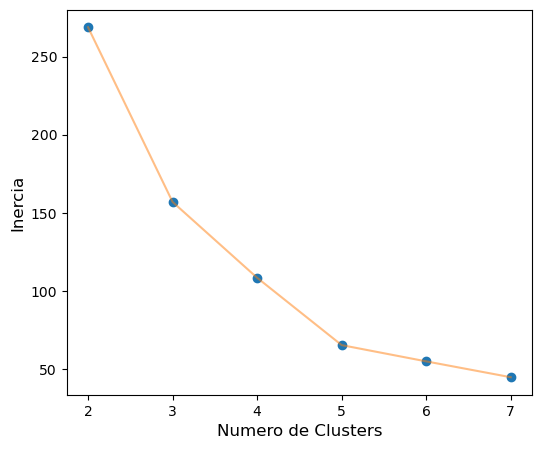

In [20]:
plt.figure(figsize=(6,5), dpi=100)
plt.plot(range(2,8), inercias , 'o')
plt.plot(range(2,8), inercias , '-' , alpha = 0.5)
plt.xlabel('Numero de Clusters',fontsize = 12) 
plt.ylabel('Inercia',fontsize = 12)
plt.show()

In [21]:
k = 5
kmeans = KMeans(n_clusters = k ,
                        init = 'k-means++',
                        n_init = 10,
                        max_iter=300,
                        tol = 0.0001,
                        random_state= 123 ,
                        algorithm='elkan') 

kmeans.fit(df[actual_features])
y_pred_3 = kmeans.predict(df[actual_features])
y_pred_3

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [22]:
silhouette_score(df[actual_features], kmeans.labels_)

0.5546571631051772

In [23]:
df['cluster3'] = y_pred_3

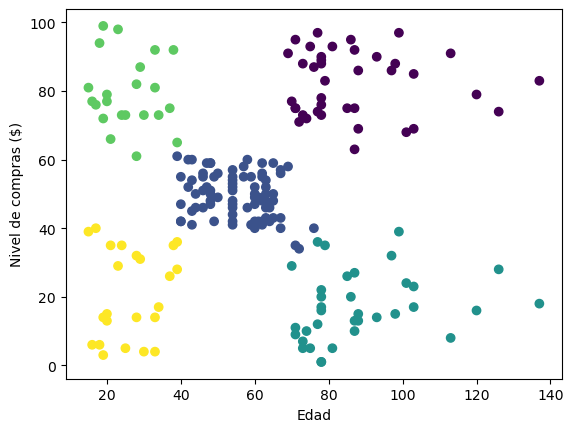

In [24]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c= df['cluster3'])
plt.xlabel('Edad')
plt.ylabel('Nivel de compras ($)');